## **Scraping Top Repositories for Topics on GitHub**


In [ ]:
!pip install bs4 --upgrade --quiet
!pip install requests 

### **Picking url and have an idea of our objective**
# Scrape the list of topics from Github
## objective:
     create a CSV file in the following format:
Repo Name,Username,Stars,Repo URL

three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,18300,https://github.com/libgdx/libgdx


**Using requests library**

In [ ]:
import requests

In [ ]:
base_url='https://github.com/topics'

In [ ]:
response=requests.get(base_url)
response.status_code

For knowing about response codes 
go through the link
https://docs.microsoft.com/en-us/troubleshoot/iis/http-status-code

In [ ]:
len(response.text)

In [ ]:
page_contents=response.text
page_contents[:300]

In [14]:
with open('github_scrape.html','w') as f:
  f.write(page_contents)

We can find the file in the same folder as an html extension named as given by us.

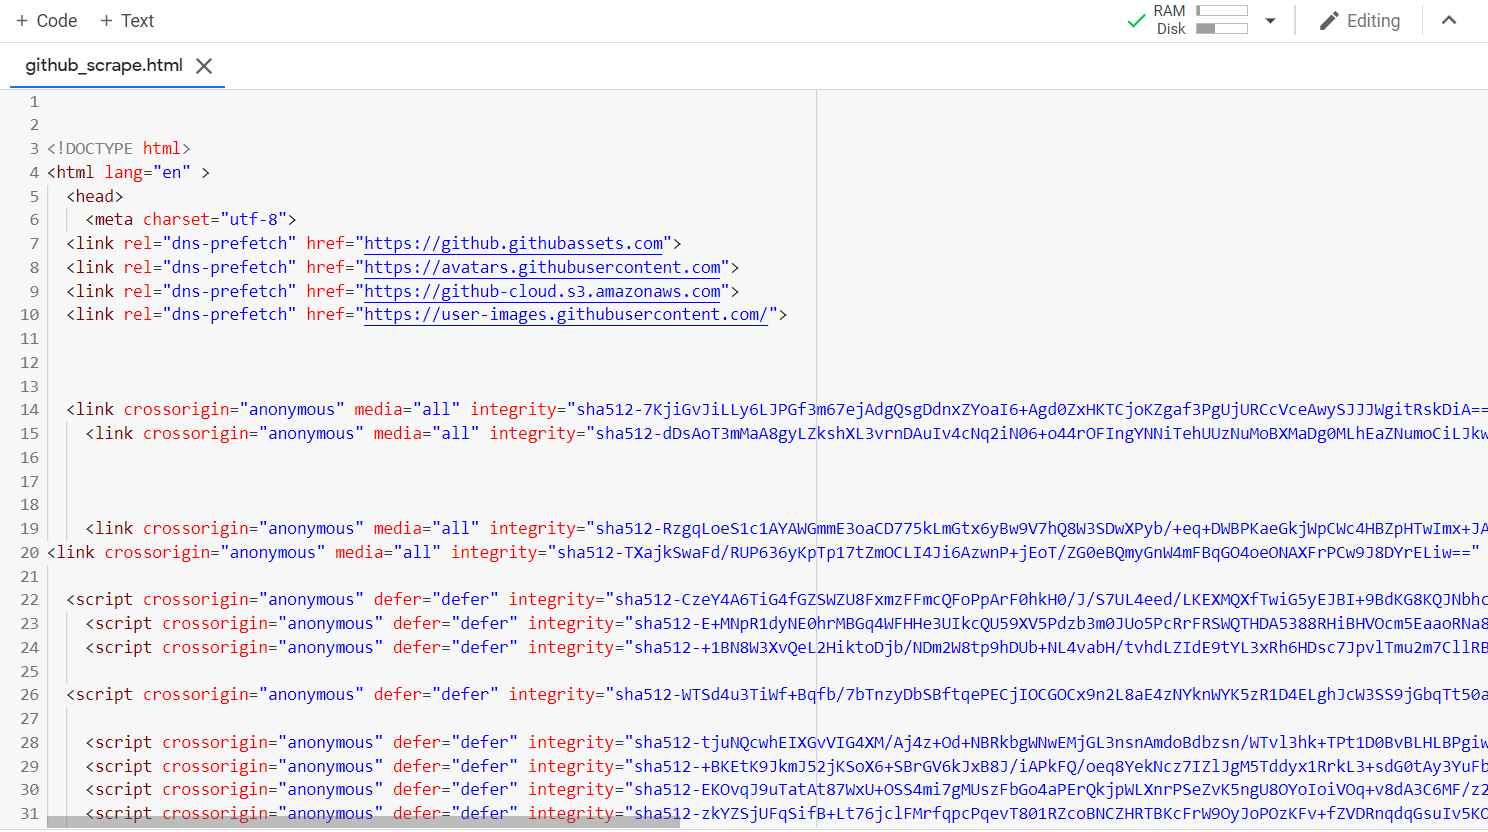

**Using beautifulsoup**

In [15]:
from bs4 import BeautifulSoup

In [16]:
doc = BeautifulSoup(page_contents, 'html.parser')

Getting started with the tags fining 
As we can see from the pic we copy paste the selected class from the inspected webpage.

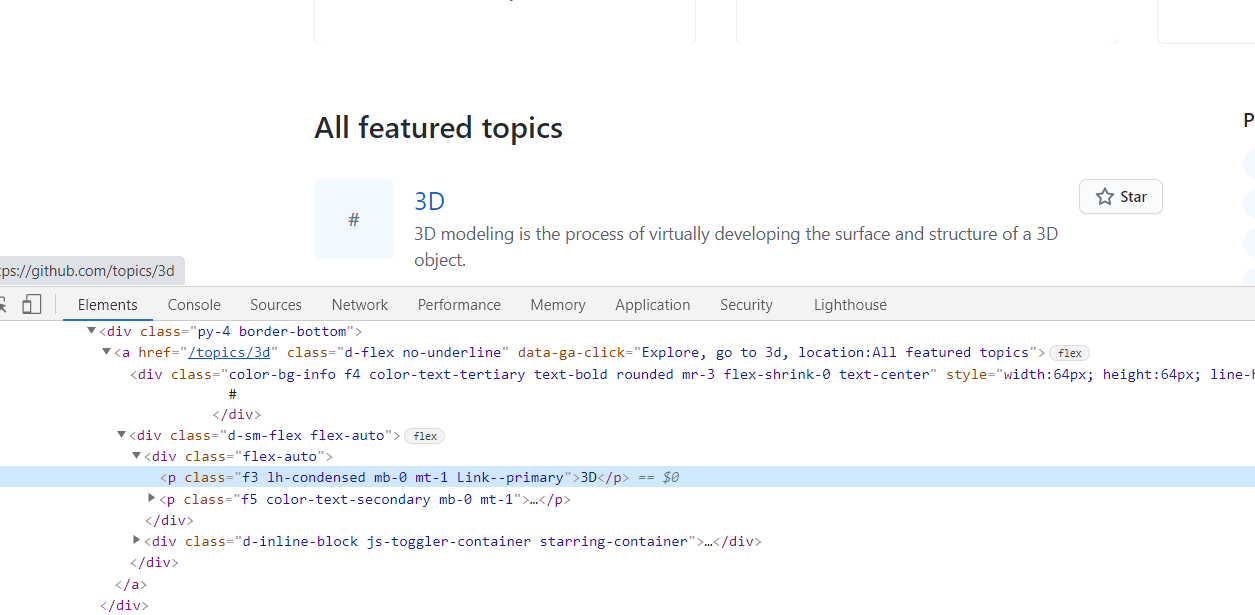

In [18]:
selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'

topic_title_tags = doc.find_all('p', {'class': selection_class})
len(topic_title_tags)

30

In [19]:
topic_title_tags[:10]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Angular</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ansible</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">API</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Arduino</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">ASP.NET</p>]

In [20]:
desc_selector = 'f5 color-text-secondary mb-0 mt-1'
topic_desc_tags = doc.find_all('p', {'class': desc_selector})

In [22]:
topic_desc_tags[:5]

[<p class="f5 color-text-secondary mb-0 mt-1">
               3D modeling is the process of virtually developing the surface and structure of a 3D object.
             </p>, <p class="f5 color-text-secondary mb-0 mt-1">
               Ajax is a technique for creating interactive web applications.
             </p>, <p class="f5 color-text-secondary mb-0 mt-1">
               Algorithms are self-contained sequences that carry out a variety of tasks.
             </p>, <p class="f5 color-text-secondary mb-0 mt-1">
               Amp is a non-blocking concurrency framework for PHP.
             </p>, <p class="f5 color-text-secondary mb-0 mt-1">
               Android is an operating system built by Google designed for mobile devices.
             </p>]

In [25]:
topic_link_tags = doc.find_all('a', {'class': 'd-flex no-underline'})
len(topic_link_tags)

30

In [27]:
topic_link_tags[0]

<a class="d-flex no-underline" data-ga-click="Explore, go to 3d, location:All featured topics" href="/topics/3d">
<div class="color-bg-info f4 color-text-tertiary text-bold rounded mr-3 flex-shrink-0 text-center" style="width:64px; height:64px; line-height:64px;">
            #
          </div>
<div class="d-sm-flex flex-auto">
<div class="flex-auto">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-text-secondary mb-0 mt-1">
              3D modeling is the process of virtually developing the surface and structure of a 3D object.
            </p>
</div>
<div class="d-inline-block js-toggler-container starring-container">
<a aria-label="You must be signed in to star a topic" class="btn btn-sm d-flex flex-items-center" data-ga-click="Explore, click star button when signed out,
        action:topics#index;
        text:Star" href="/login?return_to=%2Ftopics%2F3d" title="You must be signed in to star a topic">
<svg aria-hidden="true" class="octicon octicon-star

In [28]:
topic0_url = "https://github.com" + topic_link_tags[0]['href']
print(topic0_url)

https://github.com/topics/3d


### The above cell is to show how the url of topic is printed using the string operations

In [29]:
topic_titles = []

for tag in topic_title_tags:
    topic_titles.append(tag.text)
    
print(topic_titles)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


In [30]:
len(topic_titles)

30

**knowing the full forms of variables we used:**

*topic_titles=titles of the topics we are going scrape*

*topic_descs=description about the topic*

*topic_urls=url link for the topic* 

In [31]:
topic_descs = []

for tag in topic_desc_tags:
    topic_descs.append(tag.text.strip())
    
topic_descs[:5]

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency framework for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

In [33]:
topic_urls = []
base_url = 'https://github.com'

for tag in topic_link_tags:
    topic_urls.append(base_url + tag['href'])
    
topic_urls

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

In [34]:
!pip install pandas --quiet

**creating csv files of extracted data and working with pandas**

In [39]:
import pandas as pd
topics_dict = {
    'title': topic_titles,
    'description': topic_descs,
    'url': topic_urls
}

**using pandas dataframe framing thee data of the topics on the topics page of github**

In [41]:
topics_df = pd.DataFrame(topics_dict)
topics_df

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency framework fo...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


In [44]:
topics_df.to_csv('topics.csv', index=None)

**getting info from topic**

In [45]:
topic_page_url = topic_urls[0]
topic_page_url 

'https://github.com/topics/3d'

In [46]:
response = requests.get(topic_page_url)
response.status_code

200

In [47]:
len(response.text)

580468

In [48]:
topic_doc = BeautifulSoup(response.text, 'html.parser')

In [49]:
h1_selection_class = 'f3 color-text-secondary text-normal lh-condensed'
repo_tags = topic_doc.find_all('h1', {'class': h1_selection_class} )

In [50]:
repo_tags[0]

<h1 class="f3 color-text-secondary text-normal lh-condensed">
<a data-ga-click="Explore, go to repository owner, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" href="/mrdoob">
            mrdoob
</a>          /
          <a class="text-bold" data-ga-click="Explore, go to repository, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="517d3d5cb9d89752156923904a4238816bc9b51ab7772f3e3644

In [51]:
len(repo_tags)

30

In [52]:
a_tags = repo_tags[0].find_all('a')
a_tags[0].text.strip()

'mrdoob'

In [54]:
base_url = 'https://github.com'
repo_url = base_url + a_tags[0]['href']
print(repo_url)

https://github.com/mrdoob


In [55]:
star_tags = topic_doc.find_all('a', { 'class': 'social-count float-none'})

In [56]:
star_tags[0].text.strip()

'69.9k'

Stars count is to be in integer as we are scraping to a csv file for further analysis if we want to in future.

In [57]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
        return int(float(stars_str[:-1]) * 1000)
    return int(stars_str)

    
parse_star_count(star_tags[0].text.strip())

69900

Function for getting a repository information

Below cell as example showing the 1st repo information.



In [58]:
def get_repo_info(h1_tag, star_tag):
    # returns all the required info about a repository
    a_tags = h1_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url

In [59]:
get_repo_info(repo_tags[0], star_tags[0])

('mrdoob', 'three.js', 69900, 'https://github.com/mrdoob/three.js')

Function for information about the reposaitories in a paricular topic

In [61]:
topic_repos_dict = {
    'username': [],
    'repo_name': [],
    'stars': [],
    'repo_url': []
}


for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i], star_tags[i])
    topic_repos_dict['username'].append(repo_info[0])
    topic_repos_dict['repo_name'].append(repo_info[1])
    topic_repos_dict['stars'].append(repo_info[2])
    topic_repos_dict['repo_url'].append(repo_info[3])

# **Final code comes here**
Using the Operating System Module

  we are creating the csv files of the data extracted or scraped.

  As shown in the below figure.

  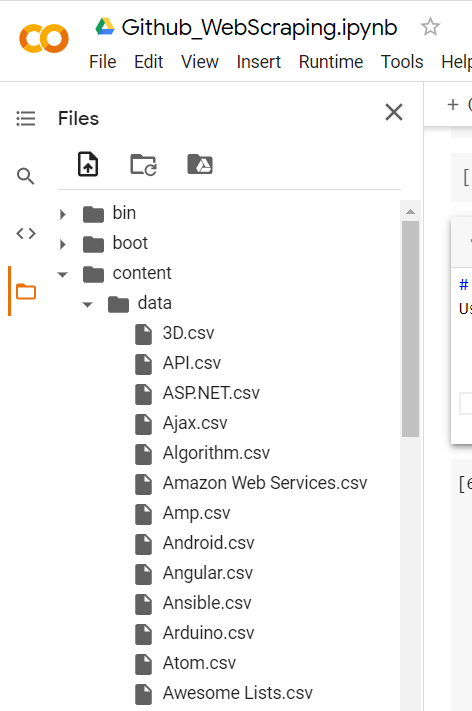



In [65]:
import os
def get_topic_page(topic_url):
    # Download the page
    response = requests.get(topic_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc
def get_repo_info(h1_tag, star_tag):
    # returns all the required info about a repository
    a_tags = h1_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url

def get_topic_repos(topic_doc):
    # Get the h1 tags containing repo title, repo URL and username
    h1_selection_class = 'f3 color-text-secondary text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h1', {'class': h1_selection_class} )
    # Get star tags
    star_tags = topic_doc.find_all('a', { 'class': 'social-count float-none'})
    
    topic_repos_dict = { 'username': [], 'repo_name': [], 'stars': [],'repo_url': []}

    # Get repo info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
        
    return pd.DataFrame(topic_repos_dict)


def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print("The file {} already exists. Skipping...".format(path))
        return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)


* os.path.exists() is used to find the existing path or whether already scraped data id present 

In [70]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

def get_topic_descs(doc):
    desc_selector = 'f5 color-text-secondary mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})
    topic_descs = []
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs

def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a', {'class': 'd-flex no-underline'})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])
    return topic_urls
    

def scrape_topics():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_descs(doc),
        'url': get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)

def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'Scraped_repo_data/{}.csv'.format(row['title']))

In [72]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "3D"
The file Scraped_repo_data/3D.csv already exists. Skipping...
Scraping top repositories for "Ajax"
The file Scraped_repo_data/Ajax.csv already exists. Skipping...
Scraping top repositories for "Algorithm"
The file Scraped_repo_data/Algorithm.csv already exists. Skipping...
Scraping top repositories for "Amp"
The file Scraped_repo_data/Amp.csv already exists. Skipping...
Scraping top repositories for "Android"
The file Scraped_repo_data/Android.csv already exists. Skipping...
Scraping top repositories for "Angular"
The file Scraped_repo_data/Angular.csv already exists. Skipping...
Scraping top repositories for "Ansible"
The file Scraped_repo_data/Ansible.csv already exists. Skipping...
Scraping top repositories for "API"
The file Scraped_repo_data/API.csv already exists. Skipping...
Scraping top repositories for "Arduino"
The file Scraped_repo_data/Arduino.csv already exists. Skipping...
Scraping top repositories for "ASP.NET"
T

# **Project of scraping the github data is done succesfully**

** the objective csv files are obtained on the data folder and the obejective can be as follows **

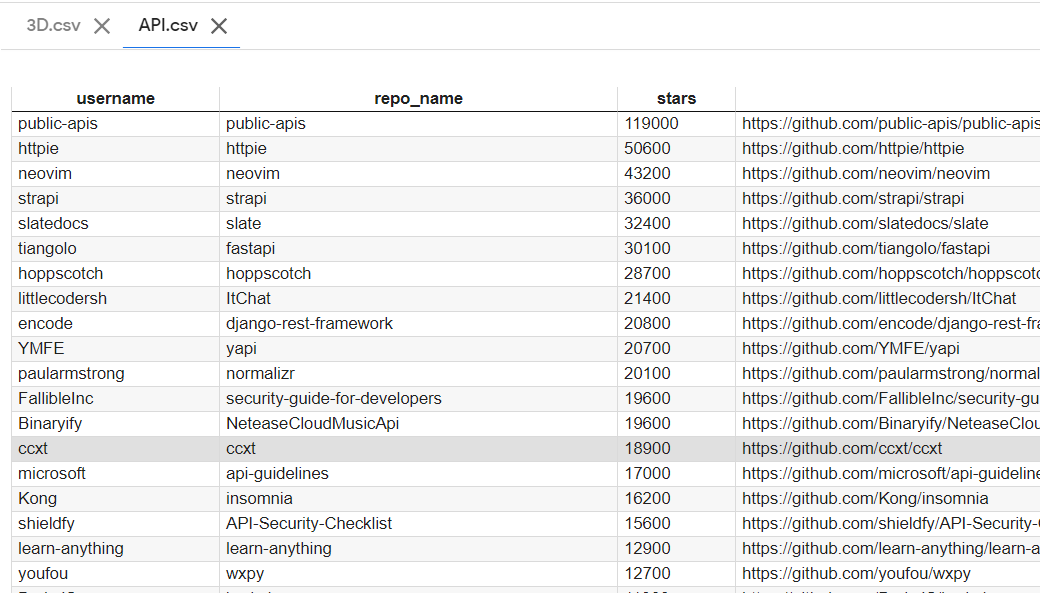